<a href="https://colab.research.google.com/github/wqw547243068/school-of-ai-beijing/blob/master/code/lecture_2/Scikit_learn%E5%AD%A6%E4%B9%A0%E7%AC%94%E8%AE%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scikit-learn学习笔记
- 机器学习工具包
- ![](http://tuchuang-zc.oss-cn-shenzhen.aliyuncs.com/site-pictures/ml_map.png)
   - [机器学习算法交互体验](https://codepen.io/collection/DPWwaj/2/)
- 江湖名言
   - <font color='blue'>数据</font>和<font color='blue'>特征</font>决定了机器学习的<font color='red'>上限</font>，而<font color='blue'>模型</font>和<font color='blue'>算法</font>只是逼近这个上限而已
## 简介
- 机器学习流程（参考：[机器学习之 sklearn中的pipeline](http://frankchen.xyz/2018/04/08/pipeline-in-machine-learning/)）
![ml](http://images.gitbook.cn/e195a180-645f-11e7-a892-db2e6cab1d5f)
- sklearn流程（参考：[机器学习该如何入门](https://blog.csdn.net/u013709270/article/details/76058123)）
![ml](http://frankchen.xyz/images/15231783974167.jpg)


## datasets包
- sklearn中自带了各种数据集来满足不同的任务需求，例如使用iris数据进行分类任务。
- （1）直接导入已有数据集——load_*
- （2）单独创建数据集——make_*
- （3）下载数据集——fetch_*

In [0]:
from sklearn import datasets as d
import numpy as np

#datasets.*? #查看datasets下的方法,同dir(datasets)
#dir(datasets)
#datasets.load_*? #直接加载数据集
#datasets.fetch_*? #下载某些数据集
#datasets.*?
#datasets.make_*? #创建样本数据集
#创建回归数据集
reg_data = d.make_regression() 
reg_data[0].shape,reg_data[1].shape #获取矩阵大小
#自定义更复杂的数据集
complex_reg_data = d.make_regression(1000, 10, 5, 2, 1.0)
complex_reg_data[0].shape,complex_reg_data[1].shape
#创建一个非均衡数据集
classification_set = d.make_classification(weights=[0.1])
np.bincount(classification_set[1])
#reg_data[0][1:4,1:7] #截取
#reg_data[0].shape

array([10, 90])

# 回归

## boston数据集

506 506


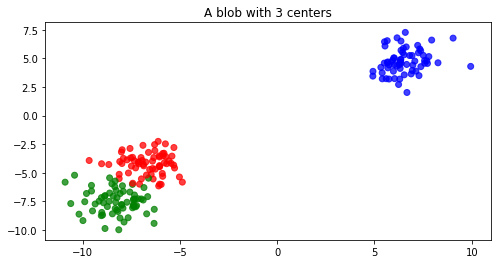

In [0]:
#加载boston数据集——数据并非numpy类型，而是bunch类型（含data自变量和target隐变量，继承自dict的设计模式）
boston = d.load_boston()
#print(boston.DESCR)
X, y = boston.data, boston.target
print len(X),len(y)
#下载加州房价数据
#housing = datasets.fetch_california_housing()
#print(housing.DESCR)
#创建聚类数据集
import sklearn.datasets as d
from matplotlib import pyplot as plt
import numpy as np

blobs = d.make_blobs(200)
f = plt.figure(figsize=(8, 4))
ax = f.add_subplot(111)
ax.set_title("A blob with 3 centers")
colors = np.array(['r', 'g', 'b'])
ax.scatter(blobs[0][:, 0], blobs[0][:, 1], color=colors[blobs[1].astype(int)], alpha=0.75)

## 数据预处理

In [0]:
#数据预处理
from sklearn import preprocessing
import numpy as np
from sklearn import datasets as d
#加载波士顿数据集
boston = d.load_boston()
X, y = boston.data, boston.target
X[:, :3].mean(axis=0) #前三个特征的均值
#array([  3.59376071,  11.36363636,  11.13677866])
X[:, :3].std(axis=0) #前三个特征的标准差
X_2 = preprocessing.scale(X[:, :3]) #标准
X_2.mean(axis=0)
#array([  6.34099712e-17,  -6.34319123e-16,  -2.68291099e-15])
X_2.std(axis=0)
#array([ 1.,  1.,  1.])

array([1., 1., 1.])

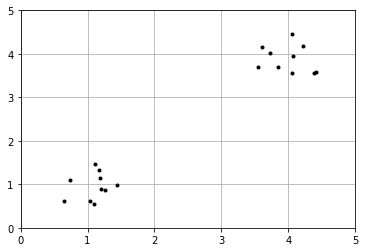

In [0]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
#随机生成一个实数，范围在（0.5,1.5）之间
cluster1 = np.random.uniform(0.5,1.5,(2,10))
cluster2 = np.random.uniform(3.5,4.5,(2,10))
#hstack拼接操作
X = np.hstack((cluster1, cluster2)).T
plt.figure()
plt.axis([0,5,0,5])
plt.grid(True)
plt.plot(X[:,0],X[:,1],'k.')

# 分类
- 分类的核心目的是给定一个样本的数据观测，根据一个数据模型得出预测该样本属于哪个类别

## 二分类-LR回归
- [logistics回归详解](http://blog.csdn.net/xlinsist/article/details/51289825)

In [0]:
#logistics回归详解：http://blog.csdn.net/xlinsist/article/details/51289825
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = datasets.load_iris() # 由于Iris是很有名的数据集，scikit-learn已经原生自带了。
X = iris.data[:, [2, 3]]
y = iris.target # 标签已经转换成0，1，2了
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # 为了看模型在没有见过数据集上的表现，随机拿出数据集中30%的部分做测试

# 为了追求机器学习和最优化算法的最佳性能，我们将特征缩放
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train) # 估算每个特征的平均值和标准差
sc.mean_ # 查看特征的平均值，由于Iris我们只用了两个特征，所以结果是array([ 3.82857143,  1.22666667])
sc.scale_ # 查看特征的标准差，这个结果是array([ 1.79595918,  0.77769705])
X_train_std = sc.transform(X_train)
# 注意：这里我们要用同样的参数来标准化测试集，使得测试集和训练集之间有可比性
X_test_std = sc.transform(X_test)

# 训练感知机模型
from sklearn.linear_model import Perceptron
# n_iter：可以理解成梯度下降中迭代的次数
# eta0：可以理解成梯度下降中的学习率
# random_state：设置随机种子的，为了每次迭代都有相同的训练集顺序
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

# 分类测试集，这将返回一个测试结果的数组
y_pred = ppn.predict(X_test_std)
# 计算模型在测试集上的准确性，我的结果为0.9，还不错
accuracy_score(y_test, y_pred)

/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


0.8

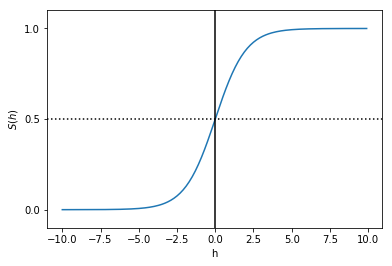

In [0]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(h):
    return 1.0 / (1.0 + np.exp(-h))

h = np.arange(-10, 10, 0.1) # 定义x的范围，像素为0.1
s_h = sigmoid(h) # sigmoid为上面定义的函数
plt.plot(h, s_h)
plt.axvline(0.0, color='k') # 在坐标轴上加一条竖直的线，0.0为竖直线在坐标轴上的位置
plt.axhspan(0.0, 1.0, facecolor='1.0', alpha=1.0, ls='dotted') # 加水平间距通过坐标轴
plt.axhline(y=0.5, ls='dotted', color='k') # 加水线通过坐标轴
plt.yticks([0.0, 0.5, 1.0]) # 加y轴刻度
plt.ylim(-0.1, 1.1) # 加y轴范围
plt.xlabel('h')
plt.ylabel('$S(h)$')
plt.show()

## 多分类-iris数据集

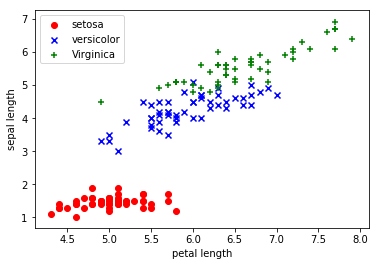

In [0]:
#iris数据集散点图
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None) # 加载Iris数据集作为DataFrame对象
X = df.iloc[:, [0, 2]].values # 取出2个特征，并把它们用Numpy数组表示

plt.scatter(X[:50, 0], X[:50, 1],color='red', marker='o', label='setosa') # 前50个样本的散点图
plt.scatter(X[50:100, 0], X[50:100, 1],color='blue', marker='x', label='versicolor') # 中间50个样本的散点图
plt.scatter(X[100:, 0], X[100:, 1],color='green', marker='+', label='Virginica') # 后50个样本的散点图
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc=2) # 把说明放在左上角，具体请参考官方文档
plt.show()

In [0]:
#!/usr/bin/env python
# coding=utf-8

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', alpha=1.0, linewidth=1, marker='o', s=55, label='test set')

In [0]:
#logistics回归
#依赖以上自定义function： plot_decision_regions
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)
lr.predict_proba(X_test_std[0,:]) # 查看第一个测试样本属于各个类别的概率
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


ValueError: ignored

In [1]:
import numpy as np 
from sklearn import datasets 
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import Perceptron 
from sklearn.metrics import accuracy_score 

iris = datasets.load_iris()  
X = iris.data[:,[2,3]] 
y = iris.target 

# 处理数据集，得到训练集和测试集。 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)  

# 对特征数据进行标准化处理 
sc = StandardScaler() 
sc.fit(X_train) 
X_train_std = sc.transform(X_train) 
X_test_std = sc.transform(X_test)  

# 训练分类器 
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0) 
ppn.fit(X_train_std, y_train) 

# 预测并评估分类器性能
y_pred = ppn.predict(X_test_std)  
acc_score = accuracy_score(y_test, y_pred)

ImportError: ignored

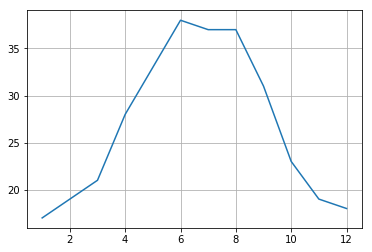

s


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

x=np.arange(1,13,1)
y=np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18 ])
plt.plot(x,y)
plt.grid()
plt.show()
print 's'

## 多分类-文本分类

In [0]:
#[2017-7-25]sklearn文本分类
from sklearn import datasets as d
from sklearn.datasets import fetch_20newsgroups

data_all = d.load_iris()
data_x = data_all['data']
data_y = data_all['target_names']
#print data_y
#print data_x
print len(data_x)
#dir(d)

# print d.fetch_mldata(subset='train')
# newsgroup_train = fetch_20newsgroups(subset='train')

150


In [0]:
#[2017-7-25]应用sklearn做文本分类:http://blog.csdn.net/abcjennifer/article/details/23615947
from sklearn.datasets import fetch_20newsgroups 
#下载指定的数据集
#newsgroup_train = fetch_20newsgroups(subset='train') 
categories = ['comp.graphics',  
 'comp.os.ms-windows.misc',  
 'comp.sys.ibm.pc.hardware',  
 'comp.sys.mac.hardware',  
 'comp.windows.x']
newsgroup_train = fetch_20newsgroups(subset = 'train', categories = categories); #训练数据
newsgroup_test = fetch_20newsgroups(subset = 'test', categories = categories);#测试数据
dir(newsgroup_train)

['DESCR', 'data', 'filenames', 'target', 'target_names']

In [0]:
from pprint import pprint  
pprint(list(newsgroup_train.target_names)) 

['comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x']


In [0]:
#从文本中提取特征
from sklearn.feature_extraction.text import HashingVectorizer  
#只取了10000个词，即10000维feature，稀疏度还不算低,实际上用TfidfVectorizer统计可得到上万维的feature
vectorizer = HashingVectorizer(stop_words = 'english',non_negative = True,  n_features = 10000)  
fea_train = vectorizer.fit_transform(newsgroup_train.data)  
fea_test = vectorizer.fit_transform(newsgroup_test.data);  
#return feature vector 'fea_train' [n_samples,n_features]  
print 'Size of fea_train:' + repr(fea_train.shape)  
print 'Size of fea_train:' + repr(fea_test.shape)  
#11314 documents, 130107 vectors for all categories  
print 'The average feature sparsity is {0:.3f}%'.format(fea_train.nnz/float(fea_train.shape[0]*fea_train.shape[1])*100);  

/usr/local/lib/python2.7/dist-packages/sklearn/feature_extraction/hashing.py:102: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/feature_extraction/hashing.py:102: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/feature_extraction/hashing.py:102: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/feature_extraction/hashing.py:102: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


Size of fea_train:(2936, 10000)
Size of fea_train:(1955, 10000)
The average feature sparsity is 1.002%


# 聚类

## k-means聚类
- [k-means聚类分析](http://www.cnblogs.com/wuchuanying/p/6264025.html)

Text(0.5,1,u'\u7528\u8098\u90e8\u6cd5\u5219\u6765\u786e\u5b9a\u6700\u4f73\u7684K\u503c')

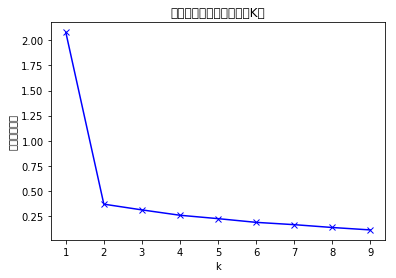

In [0]:
#coding:utf-8
#k-mean聚类分析：http://www.cnblogs.com/wuchuanying/p/6264025.html
#我们计算K值从1到10对应的平均畸变程度：
from sklearn.cluster import KMeans
#用scipy求解距离
from scipy.spatial.distance import cdist
K=range(1,10)
meandistortions=[]
for k in K:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(X)
    meandistortions.append(sum(np.min(
            cdist(X,kmeans.cluster_centers_,
                 'euclidean'),axis=1))/X.shape[0])
plt.plot(K, meandistortions, 'bx-')
plt.xlabel('k')
plt.ylabel(u'平均畸变程度')
#plt.ylabel(u'平均畸变程度',fontproperties=font)
#plt.title(u'用肘部法则来确定最佳的K值',fontproperties=font)
plt.title(u'用肘部法则来确定最佳的K值')

# 降维

In [2]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
pca = PCA(n_components=2)
reduced_X = pca.fit_transform(X)

X.shape 			# (150, 4)
reduced_X.shape 	# (150, 2)

(150, 2)

# 其它